In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data from listing datasets into pandas dataframes
df_Boston_listings = pd.read_csv('Boston_listings.csv')
# Add City column for that any analysis can be split by cities if required
df_Boston_listings['City'] = 'Boston'
df_Seattle_listings = pd.read_csv('Seattle_listings.csv')
df_Seattle_listings['City'] = 'Seattle'
df_listings = pd.concat([df_Boston_listings,df_Seattle_listings],sort=False,ignore_index=True)
print('Boston: ',df_Boston_listings.shape,'\nSeattle: ',df_Seattle_listings.shape)
print('Below columns are missing from Seattle dataset:\naccess\ninteraction\nhouse_rules')
print('Dropping above columns from combined DF')
# Dropping columns which are not available in another dataset
df_listings = df_listings.drop(columns=['access', 'interaction','house_rules'])
print('Concatenated listing DF: ',df_listings.shape)

Boston:  (3585, 96) 
Seattle:  (3818, 93)
Below columns are missing from Seattle dataset:
access
interaction
house_rules
Dropping above columns from combined DF
Concatenated listing DF:  (7403, 93)


In [3]:
# Importing data from reviews datasets into pandas dataframes
df_Boston_reviews = pd.read_csv('Boston_reviews.csv')
df_Boston_reviews['City'] = 'Boston'
df_Seattle_reviews = pd.read_csv('Seattle_reviews.csv')
df_Seattle_reviews['City'] = 'Seattle'
df_reviews = pd.concat([df_Boston_reviews,df_Seattle_reviews],sort=False,ignore_index=True)
print('Boston: ',df_Boston_reviews.shape,'\nSeattle: ',df_Seattle_reviews.shape)
print('Concatenated reviews DF: ',df_reviews.shape)

Boston:  (68275, 7) 
Seattle:  (84849, 7)
Concatenated reviews DF:  (153124, 7)


In [4]:
# Importing data from calendar datasets into pandas dataframes
df_Boston_calendar = pd.read_csv('Boston_calendar.csv')
df_Boston_calendar['City'] = 'Boston'
df_Seattle_calendar = pd.read_csv('Seattle_calendar.csv')
df_Seattle_calendar['City'] = 'Seattle'
df_calendar = pd.concat([df_Boston_calendar,df_Seattle_calendar],sort=False,ignore_index=True)
print('Boston: ',df_Boston_calendar.shape,'\nSeattle: ',df_Seattle_calendar.shape)
print('Concatenated calendar DF: ',df_calendar.shape)

Boston:  (1308890, 5) 
Seattle:  (1393570, 5)
Concatenated calendar DF:  (2702460, 5)


In [5]:
# Updating datatype of date column to datetime64[ns]
df_calendar['date']= pd.to_datetime(df_calendar['date'])
#df_calendar.head()

Text(0.5, 1.0, 'Availability By City')

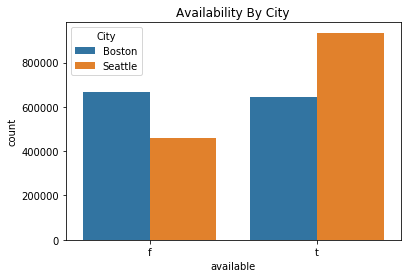

In [6]:
sns.countplot(x='available',hue='City',data=df_calendar)
plt.title('Availability By City')

It can be seen from above plot that as per datasets, most of the homes are available to rent in Seattle as compared to Boston where around half of the homes are available

In [7]:
df_listings_selected_columns = df_listings[['id','City','zipcode','latitude','longitude','property_type', 'room_type', 
                                            'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type', 
                                            'square_feet','price','has_availability','number_of_reviews',
                                            'review_scores_rating']]

#df_listings_selected_columns.info()

In [8]:
#df_listings_selected_columns = df_listings_selected_columns.copy()
df_listings_selected_columns['price'] = df_listings_selected_columns['price'].str.replace('$', '')
df_listings_selected_columns['price'] = df_listings_selected_columns['price'].str.replace(',', '')
df_listings_selected_columns['price'] = df_listings_selected_columns['price'].astype(float)
#df_listings_selected_columns.info()

/Users/mithleshpatel/anaconda2/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mithleshpatel/anaconda2/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mithleshpatel/anaconda2/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [9]:
#df_listings_selected_columns.head()

Text(0.5, 1.0, 'Columns with % of missing values in it..')

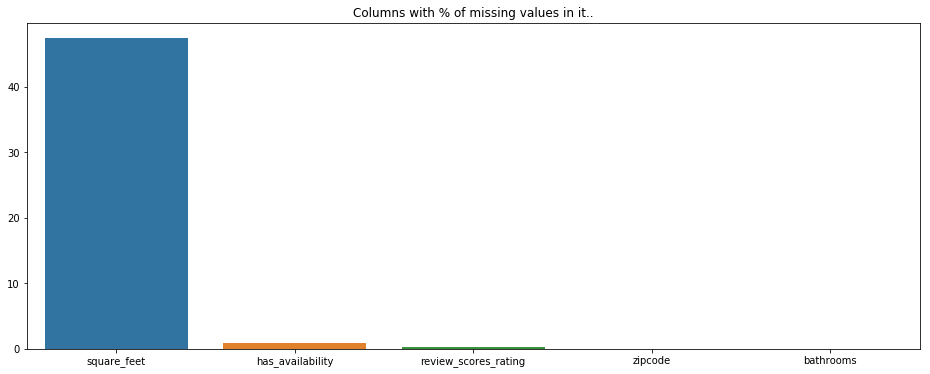

In [10]:
ser = df_listings_selected_columns.isna().sum() / df_listings_selected_columns.count()
ser = ser.sort_values(ascending=False).head(5)
plt.figure(figsize=(16, 6))
sns.barplot(ser.index, ser.values)
plt.title('Columns with % of missing values in it..')

From above graph it cab be observe that around 45% of the values are missing in column 'square_feet'.
This column can be dropped.

In [11]:
df_listings_selected_columns.drop(['square_feet'],axis=1,inplace = True)

/Users/mithleshpatel/anaconda2/envs/py3k/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
arr = df_listings_selected_columns['has_availability']
arr1=[]
for i in arr:
    if str(i) == 'nan':
        #print(i)
        arr1.append('f')
    else:
        arr1.append(str(i))
        
df_listings_selected_columns['has_availability'] = arr1


/Users/mithleshpatel/anaconda2/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [13]:
#df_listings_selected_columns['has_availability'].unique()

In [14]:
#df_reviews.columns
#df_reviews.shape

In [15]:
#df_listings_selected_columns.columns


In [16]:
df_calendar.columns
df_calendar.shape
#df_calendar.head()

(2702460, 5)

/Users/mithleshpatel/anaconda2/envs/py3k/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Air BNB Price distribution Boston and Seattle')

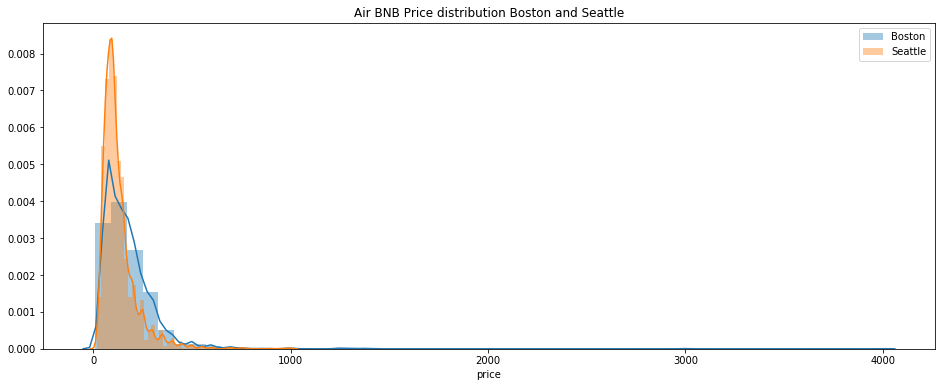

In [17]:
plt.figure(figsize=(16, 6))
sns.distplot(df_listings_selected_columns[df_listings_selected_columns['City']=='Boston']['price'],label='Boston')
sns.distplot(df_listings_selected_columns[df_listings_selected_columns['City']=='Seattle']['price'],label='Seattle')
plt.legend()
plt.title('Air BNB Price distribution Boston and Seattle')

From above graph it seems most of the prices in both cities are below 1000$ or I should say below 500$
Lets get rid of outliers and see the distribution again.

Text(0.5, 1.0, 'Air BNB Price distribution (after removing outliers) Boston and Seattle')

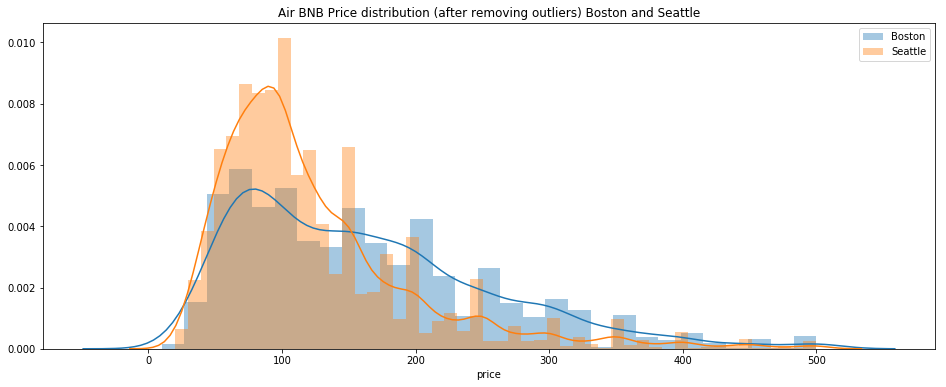

In [18]:
plt.figure(figsize=(16, 6))
sns.distplot(df_listings_selected_columns[(df_listings_selected_columns['City']=='Boston') & 
                                         (df_listings_selected_columns['price']<=500)]['price'],label='Boston')
sns.distplot(df_listings_selected_columns[(df_listings_selected_columns['City']=='Seattle') &
                                         (df_listings_selected_columns['price']<=500)]['price'],label='Seattle')
plt.legend()
plt.title('Air BNB Price distribution (after removing outliers) Boston and Seattle')

In [19]:
df_listings_selected_columns = df_listings_selected_columns[df_listings_selected_columns['price']<=500]
#df_listings_selected_columns.head()

In [20]:
df_plot_prop_type = df_listings_selected_columns[['City','property_type','price']]
df_plot_prop_type = df_plot_prop_type.groupby(['City','property_type'])['price'].mean().reset_index()
#df_plot_prop_type.sort_values('price',ascending=False).head()

In [21]:
df_plot_prop_type = df_plot_prop_type.sort_values(['City','price'],ascending=False)

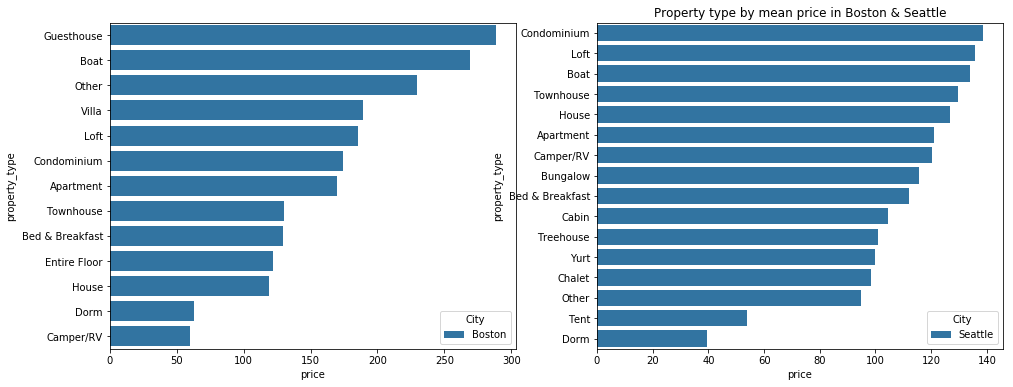

In [22]:

fig, ax = plt.subplots(1,2,figsize=(16, 6))

plt.title('Property type by mean price in Boston & Seattle')
plt.xlabel('Price')
plt.ylabel('Property Type')

sns.barplot(x='price',y='property_type',hue='City',
            data=df_plot_prop_type[df_plot_prop_type['City']=='Boston'],ax=ax[0])
plt.title('Property type by mean price in Boston & Seattle')
plt.xlabel('Price')
plt.ylabel('Property Type')

sns.barplot(x='price',y='property_type',hue='City',
            data=df_plot_prop_type[df_plot_prop_type['City']=='Seattle'],
           ax=ax[1])


From above graph, it can be seen that guesthouses, boats, villas are more expensive in Boston whereas condominium, lofts,
townhouses are more expensive in Seattle. These might be the properties good for families.
There seems some dorm, tent and camper type properties available at very cheap rate in both of these cities.
This can be a better choice for students who don't want to spent lot of money only for staying.

In [23]:
#Checking how many unique type of peroperties are available in both the cities
room_types = df_listings_selected_columns['room_type'].unique()

Let's check the price distribution by each property types available in Boston and Seattle

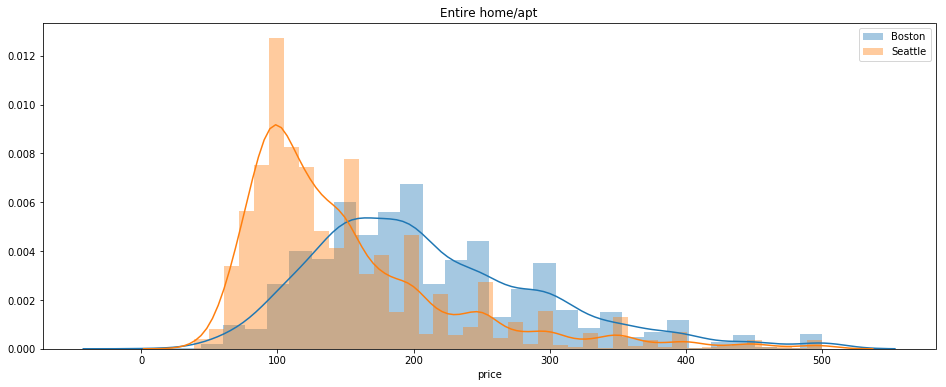

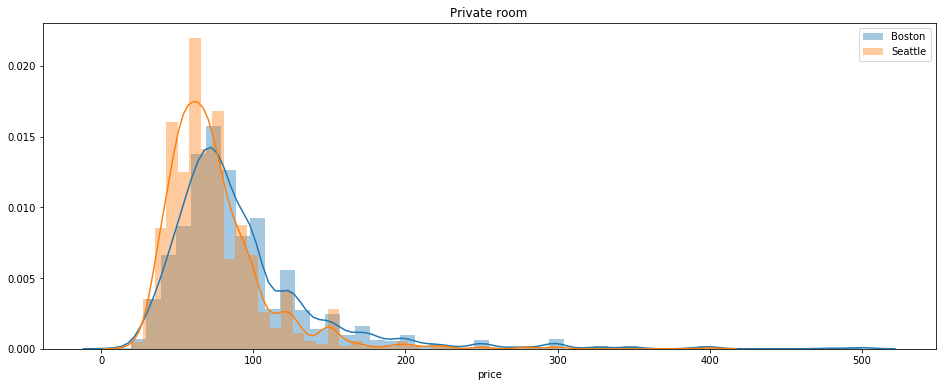

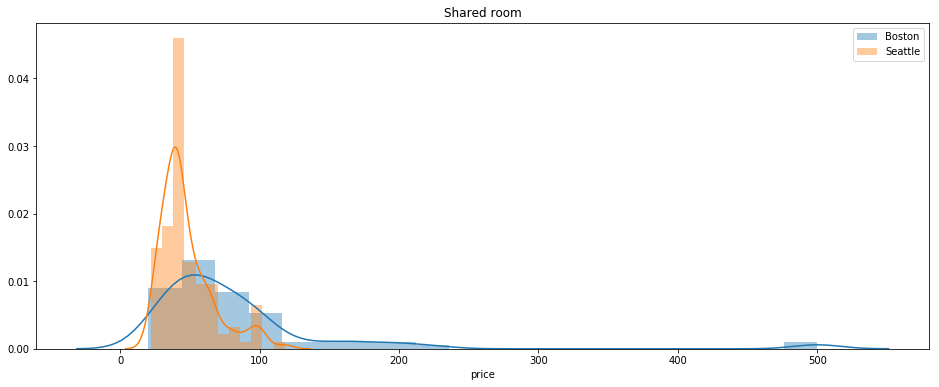

In [24]:
#Plotting price distribution for each property type in both cities
for roomtype in room_types:
    plt.figure(figsize=(16, 6))
    sns.distplot(df_listings_selected_columns[(df_listings_selected_columns['City']=='Boston') & 
                                         (df_listings_selected_columns['room_type']==roomtype)]['price'],label='Boston')
    sns.distplot(df_listings_selected_columns[(df_listings_selected_columns['City']=='Seattle') &
                                         (df_listings_selected_columns['room_type']==roomtype)]['price'],label='Seattle')
    plt.legend()
    plt.title(roomtype)

It can be see that an entire home or apartment is more expensive in Boston than Seattle.
It seems entire home or apartment is available from around $100 to $150 in Seattle whereas the range for similar property in Boston is from $150 to $300.
Private room also is little more expansive in Boston as compared to Seattle but the variation is not huge. It can be seen that majority of the properties of this kind are available in less than$150 in both the cities.
Share rooms as expected are cheaper than any other property types, it can be seen that most of the shared properties are available under $50 whereas the same is more than $50, spread almost between $50 to $100 in Boston.
There are some very expensive shared properties also seen in Boston which is available in $500 but this seems outliers.


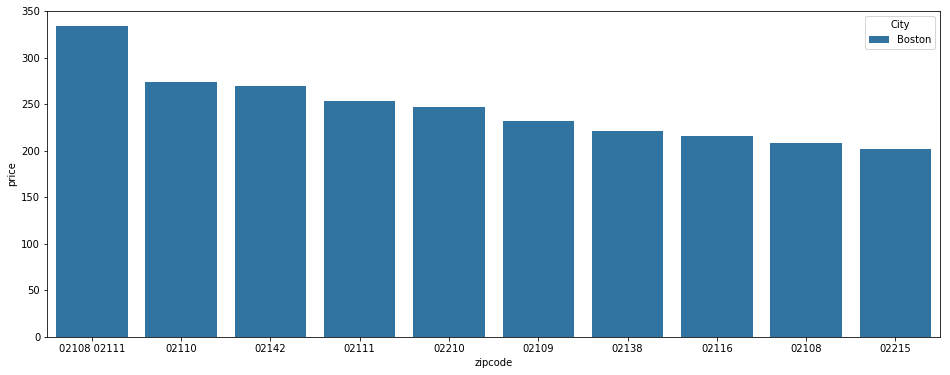

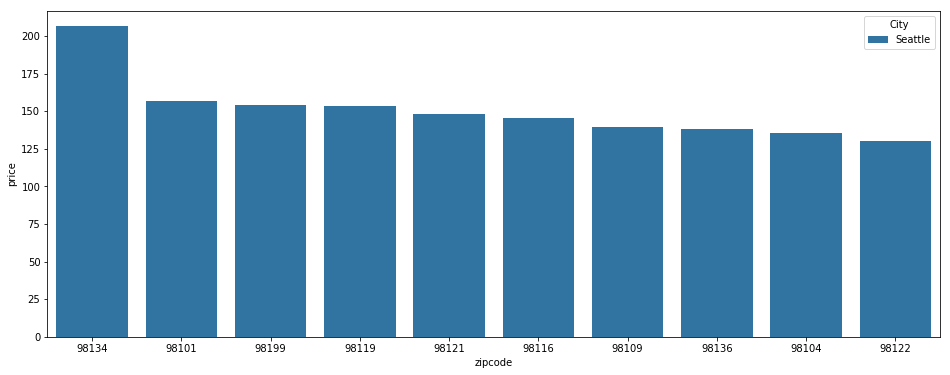

In [25]:

for city in ['Boston','Seattle']:
    df = df_listings_selected_columns[df_listings_selected_columns['City']==city]
    df = df.groupby(['City','zipcode'])['price'].mean().reset_index()
    df = df.reset_index().sort_values('price',ascending=False).head(10)
    plt.figure(figsize=(16, 6))
    sns.barplot(data=df,x='zipcode',y='price',hue='City',order=df['zipcode'])

We already know that Boston is more expensive than Seattle and it can also be seen in above graphs that most costly zip code in Boston has avg price of around $340 whereas it is around $200 in Seattle.

In [26]:
map_room_type = {'Entire home/apt':0,
                 'Private room':1,
                 'Shared room':2}
df_listings_selected_columns['room_type'] = df_listings_selected_columns['room_type'].map(map_room_type)
columns = ['zipcode','accommodates','bathrooms','bedrooms','beds','price','number_of_reviews',
           'review_scores_rating','room_type']
df_listings_selected_columns = df_listings_selected_columns[columns]
corr = df_listings_selected_columns.corr()
corr.style.background_gradient(cmap='coolwarm')

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type
accommodates,1,0.435809,0.737562,0.8355,0.576574,-0.0336039,0.023081,-0.491653
bathrooms,0.435809,1,0.512497,0.429563,0.343874,-0.0573835,0.0197226,-0.0764956
bedrooms,0.737562,0.512497,1,0.720418,0.519398,-0.0739651,0.0392396,-0.244729
beds,0.8355,0.429563,0.720418,1,0.490346,-0.0472738,0.0185377,-0.346063
price,0.576574,0.343874,0.519398,0.490346,1,-0.124331,0.041803,-0.512482
number_of_reviews,-0.0336039,-0.0573835,-0.0739651,-0.0472738,-0.124331,1,0.0334986,0.0410646
review_scores_rating,0.023081,0.0197226,0.0392396,0.0185377,0.041803,0.0334986,1,-0.0361446
room_type,-0.491653,-0.0764956,-0.244729,-0.346063,-0.512482,0.0410646,-0.0361446,1


In [27]:
pwd


'/Users/mithleshpatel/anaconda2/zipzap/NanoDegree/Data_Science_Blog_Post/Air-BNB-Data-Analysis-master'